# Exercise 1: Simple Plotting

### Using numpy arrays

In [1]:
## Load utilities
# Numpy: for scientific computing and arrays
import numpy as np
# Matplotlib: for plotting
import matplotlib.pyplot as plt

In [2]:
# Load data
filename = "ANN_7ksliced.pk"
data = np.load(filename)

In [3]:
# Numpy arrays
dname  = np.array(data[0]['dvarNames']) # input (design) names
oname  = np.array(data[0]['objNames'])  # output names
names  = data[0]['dvarNames'] + data[0]['objNames'] # all names
dval   = np.asarray(data[1]['dvarValues'],dtype=np.float64) # convert string to float
oval   = np.asarray(data[1]['objValues'],dtype=np.float64)  # output values
values = np.concatenate((dval,oval),axis=1) # all values

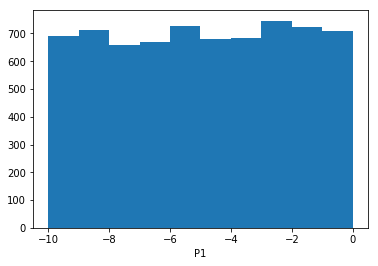

In [4]:
plt.hist(dval[:,1])
plt.xlabel(dname[1]);

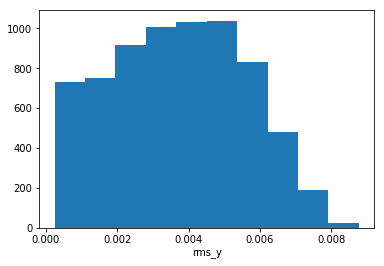

In [5]:
plt.hist(oval[:,1])
plt.xlabel(oname[1]);

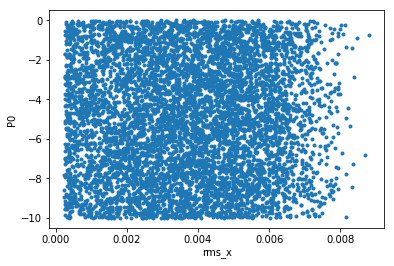

In [6]:
plt.plot(oval[:,0],dval[:,0],'.')
plt.xlabel(oname[0]);
plt.ylabel(dname[0]);

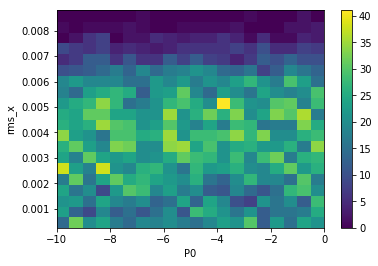

In [7]:
# Same in histogram
plt.hist2d(dval[:,0],oval[:,0],bins=(20,20));
plt.colorbar()
plt.xlabel(dname[0])
plt.ylabel(oname[0]);

### With Pandas / Seaborn

In [8]:
# Seaborn: high level plots
import seaborn as sns
# Pandas: data analysis package
import pandas as pd

In [9]:
# Dataframe on the input variables
dfinput = pd.DataFrame(data    = dval,
                       columns = dname);

In [10]:
# Dataframe on the input variables
dfoutput = pd.DataFrame(data    = oval,
                        columns = oname);

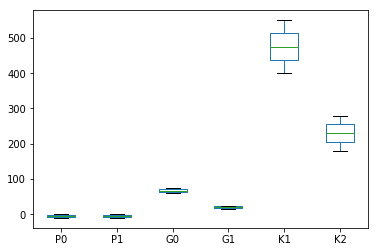

In [11]:
# box-and-whisker plots
# https://en.wikipedia.org/wiki/Box_plot
dfinput.plot.box()

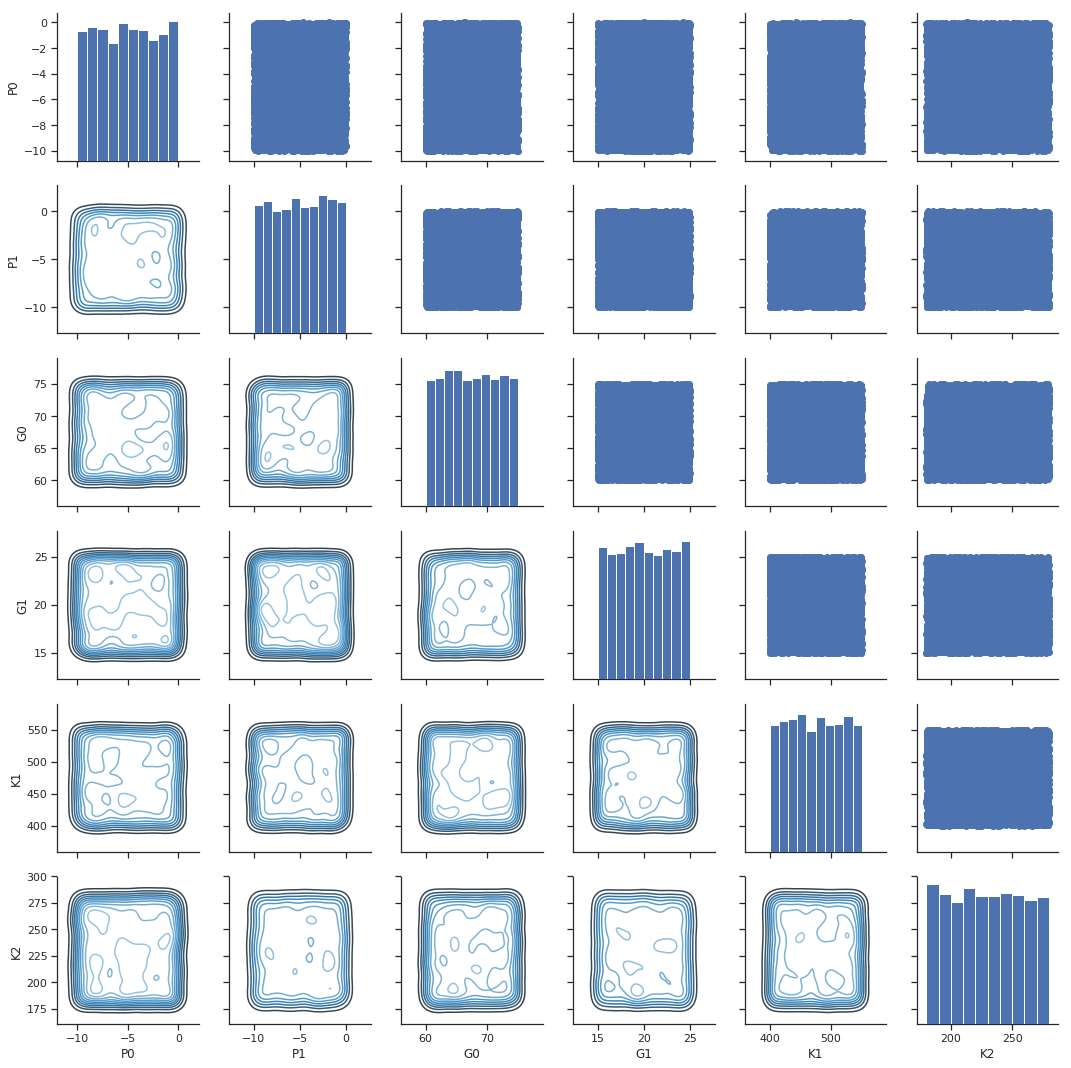

In [13]:
# Relations between output
sns.set(style="ticks", color_codes=True)
g = sns.PairGrid(dfoutput[::10]) # slice every 10 otherwise a bit slow
g = g.map_diag(plt.hist) # histograms on the diagonal
g = g.map_lower(sns.kdeplot, cmap="Blues_d") # density plot on the lower plots
g = g.map_upper(plt.scatter) # scatter plots on the upper plots